## Exercise 1

<strong>1.1 Original data plot</strong>

Next cell plots the original data loaded from data/microchips.csv
by filtering FAILED and OK microchips to different lists and then outputting them with different colours.




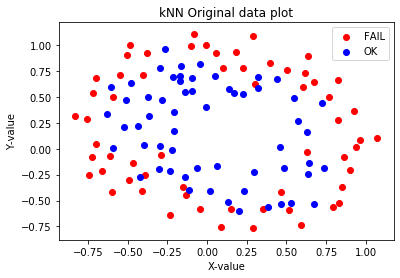

In [1]:
import numpy as np
from os import path
import matplotlib.pyplot as plt

data = np.genfromtxt(path.join('data/microchips.csv'), delimiter=',', dtype=float)

failed = list(filter(lambda chip: chip[2] == 0, data))
ok = list(filter(lambda chip: chip[2] == 1, data))

xf, yf, zf = list(zip(*failed))
plt.scatter(xf, yf, color='r')
x, y, z = list(zip(*ok))
plt.scatter(x, y, color='b')

plt.xlabel('X-value')
plt.ylabel('Y-value')
plt.legend(['FAIL', 'OK'])
plt.title("kNN Original data plot")
plt.show()

<strong>1.2 k-NN predictions</strong>

This cell predicts statuses of provided cells in the Task for k values [1, 3, 5, 7].

chip1: [-0.3, 1.0] ==> Fail<br>
chip2: [-0.5, -0.1] ==> OK<br>
chip3: [0.6, 0.0] ==> OK<br>

The results are shown as 0 (FAIL) and 1 (OK)

In [8]:
import kNearest
import numpy as np
from os import path

data = np.genfromtxt(path.join('data/microchips.csv'), delimiter=',', dtype=float)

# Create Microchips to compare
chip_1 = (-0.3, 1.0)
chip_2 = (-0.5, -0.1)
chip_3 = (0.6, 0.0)

for k in [1, 3, 5, 7]:
    print(f"k={k}")
    nearest = kNearest.k_nearest(chip_1, k, data)
    print("Chip 1 ==> ", kNearest.classifyChip(nearest))
    nearest = kNearest.k_nearest(chip_2, k, data)
    print("Chip 2 ==> ", kNearest.classifyChip(nearest))
    nearest = kNearest.k_nearest(chip_3, k, data)
    print("Chip 3 ==> ", kNearest.classifyChip(nearest))
    print("=======================")


k=1
Chip 1 ==>  1
Chip 2 ==>  0
Chip 3 ==>  0
k=3
Chip 1 ==>  0
Chip 2 ==>  0
Chip 3 ==>  1
k=5
Chip 1 ==>  0
Chip 2 ==>  1
Chip 3 ==>  1
k=7
Chip 1 ==>  0
Chip 2 ==>  0
Chip 3 ==>  1


<strong>1.3 Decision boundary</strong>

Displays a 2x2 plot showing the decision boundary and training errors.


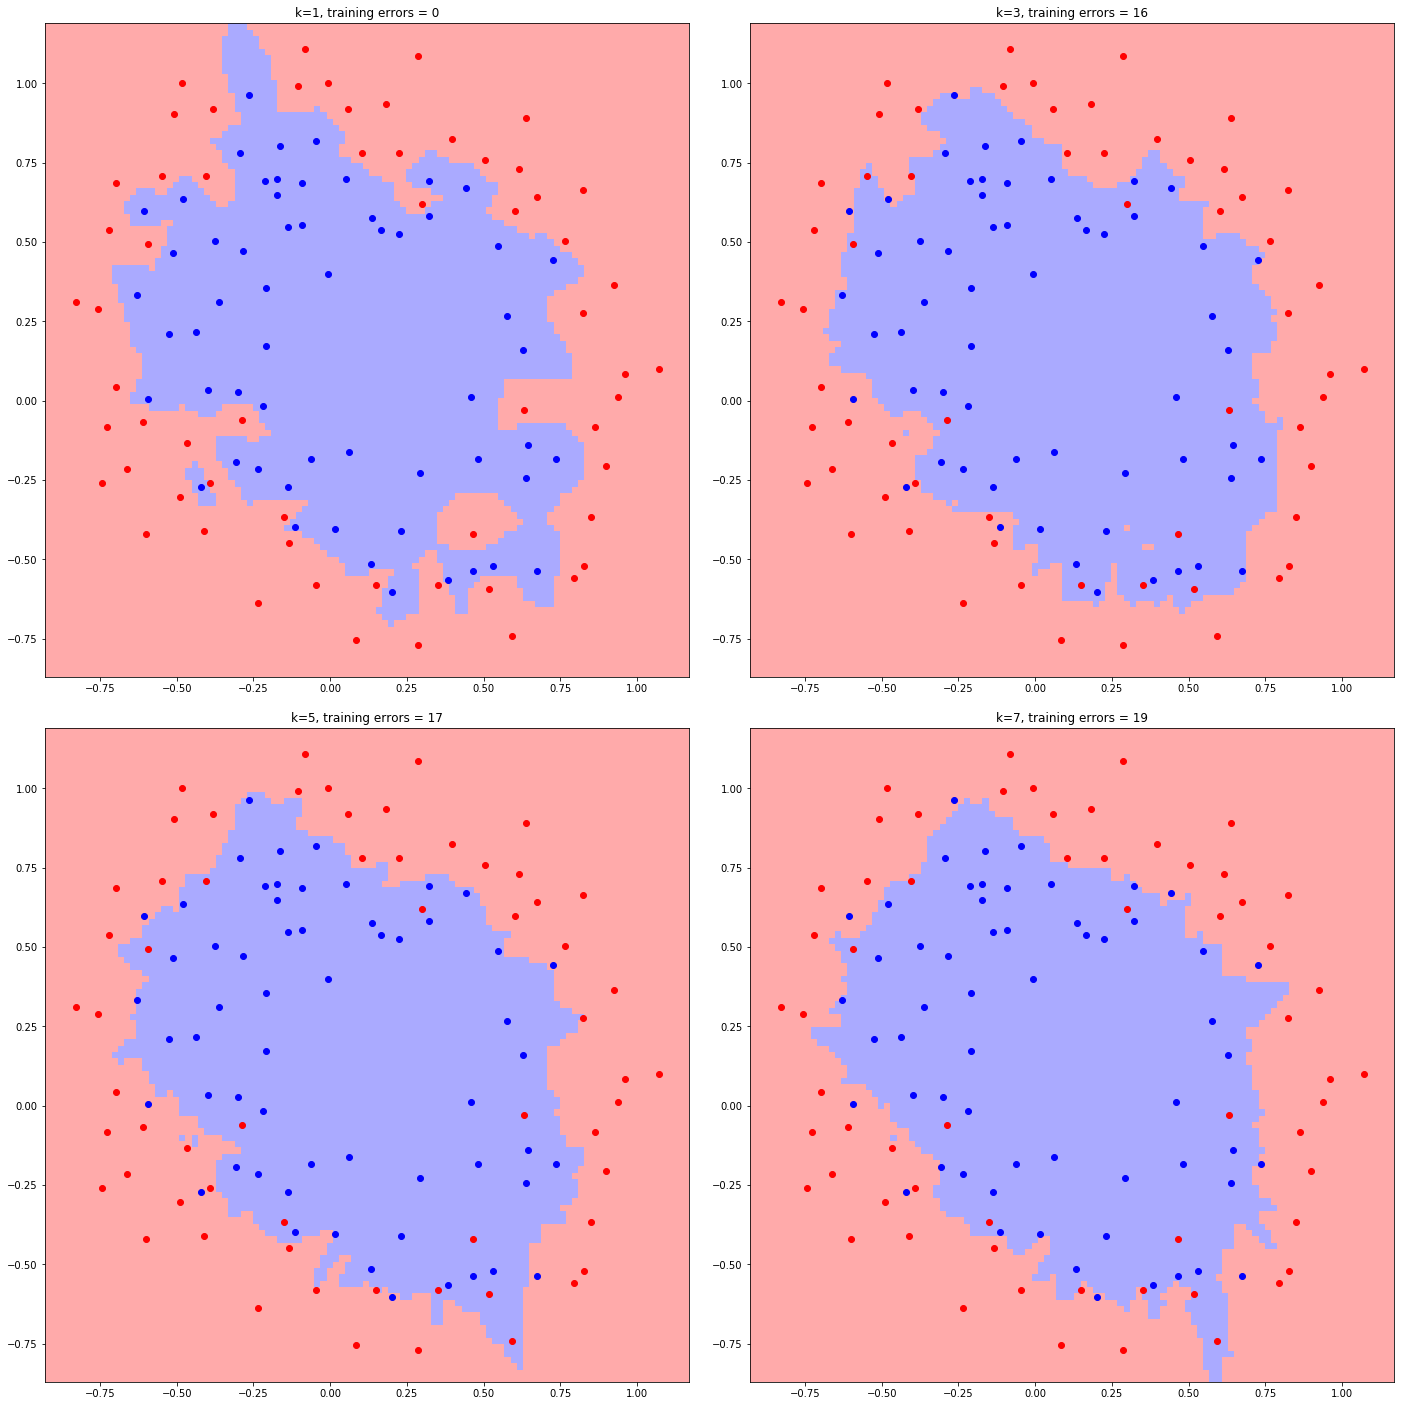

In [1]:
import numpy as np
from os import path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import kNearest
plt.rcParams["figure.figsize"] = (20,20) # scale plots 

data = np.genfromtxt(path.join('data/microchips.csv'), delimiter=',', dtype=float)

failed = list(filter(lambda chip: chip[2] == 0, data))
ok = list(filter(lambda chip: chip[2] == 1, data))

xf, yf, zf = list(zip(*failed))
x, y, z = list(zip(*ok))

h = .02  # higher resolutions gives a clearer definition of boundary

# Plotting decision regions
x_min, x_max = data[:, 0].min() - 0.1, data[:, 0].max() + 0.1  # slice array (0-118, col 0)
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1  # slice array (0-118, col 1)

#
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  # Mesh Grid
xy_mesh = np.c_[xx.ravel(), yy.ravel()]  # Turn to Nx2 matrix

# Mesh plot colors
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=3.0)
figNr = 1
for k in [1, 3, 5, 7]:
    classes = kNearest.classifyMesh(k, data, xy_mesh)  # Classify mesh
    errors = kNearest.classifyErrors(k, data)
    clz_mesh = classes.reshape(xx.shape)  # Return to mesh shape
    ax = plt.subplot(2, 2, figNr) # Create subplot n

    ax.set_title("k=%i, training errors = %i" % (k, errors),)  # title
    # Subplots
    figNr += 1
    ax.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)
    ax.scatter(x, y, color='b')
    ax.scatter(xf, yf, color='r')

plt.show()

